In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import missingno as msn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

data = pd.read_excel('./2_5301182359977087197.xlsx')
df = data.copy()

In [2]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.set_index('customer_id', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
products_number,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
credit_card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
active_member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


customer_id: This column likely represents a unique identifier for each customer. It is used to distinguish individual customers within the dataset. credit_score: This column could represent the credit score
of each customer, which is a numerical measure of an individual's creditworthiness. country: This column indicates the country where each customer is located or is associated with. gender: This column
specifies the gender (e.g., male or female) of each customer. age: This column represents the age of each customer, typically measured in years. tenure: This column might refer to the duration (in years or
months) for which each customer has been associated with the company or service. balance: This column likely indicates the account balance or financial status of each customer. products_number: This
column could represent the number of different products or services each customer has with the company (e.g., multiple accounts, subscriptions, etc.). credit_card: This column might indicate whether each
customer possesses a credit card (e.g., binary indicator like 0 or 1). active_member: This column could indicate whether a customer is an active member of a program, service, or subscription (e.g., active
= 1, inactive = 0). estimated_salary: This column likely represents the estimated salary or income of each customer. churn: This column is a key business metric and likely indicates whether each customer
has churned (i.e., stopped using or left) the service or product. This could be represented as a binary variable (e.g., churned = 1, retained = 0).

In [6]:
pd.crosstab(data.credit_card, data.churn)

churn,0,1
credit_card,,
0,2332,613
1,5631,1424


In [7]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### Sturges formula for bin size

In [8]:
print( 1 + 3.322*math.log(df.shape[0]))

31.596750715704882


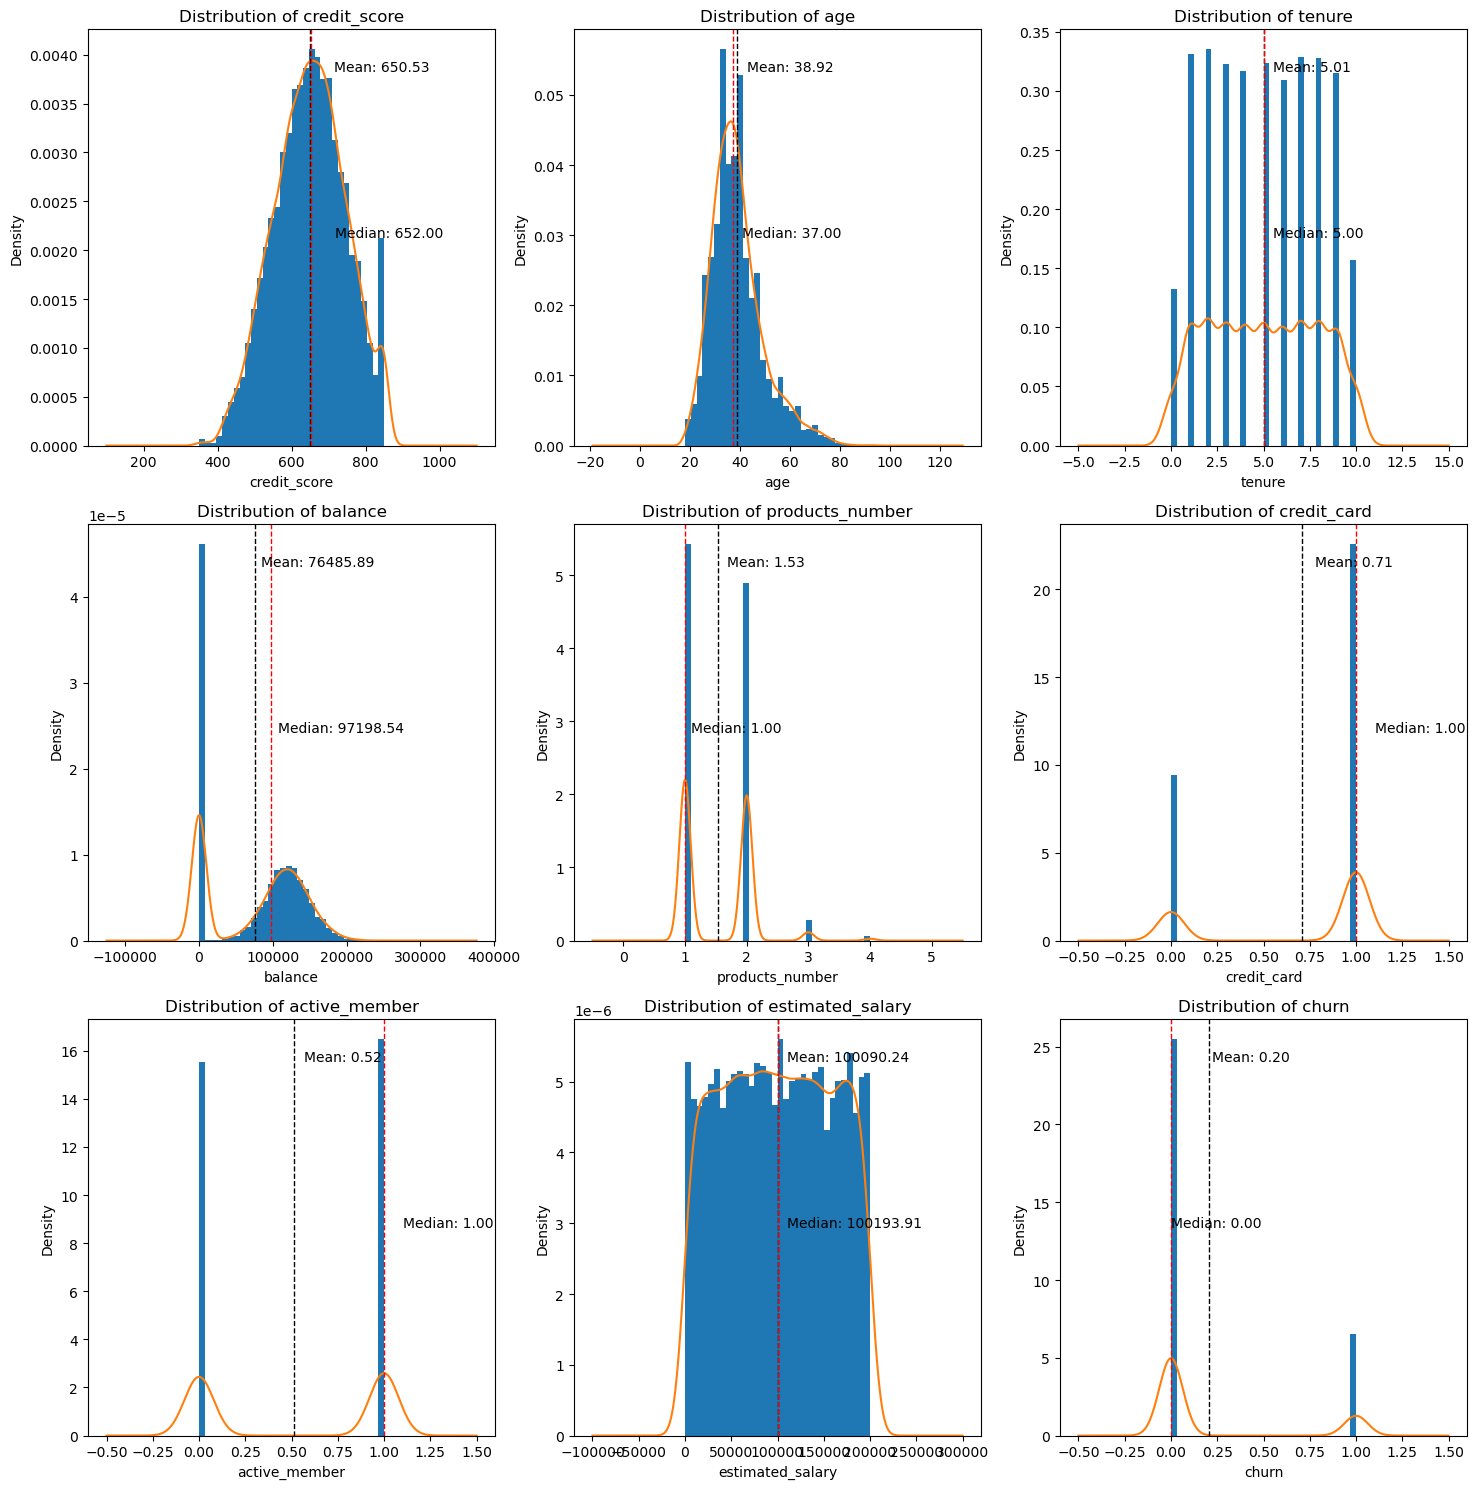

In [9]:
num_features = [i for i in df.columns if df[i].dtypes != 'object']

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

axes = axes.flatten()

# Iterate over each numerical feature and plot
for i, cols in enumerate(num_features):
    
    ax = axes[i]
    
    df[cols].plot(kind='hist', density=True, bins=32, ax=ax)
    df[cols].plot(kind='kde', ax=ax)
    
    ax.axvline(df[cols].mean(), color='k', linestyle='dashed', linewidth=1)
    ax.axvline(df[cols].median(), color='r', linestyle='dashed', linewidth=1) # median with different color
    
    min_ylim, max_ylim = ax.get_ylim()
    ax.text(df[cols].mean() * 1.1, max_ylim * 0.9, 'Mean: {:.2f}'.format(df[cols].mean()))
    ax.text(df[cols].median() * 1.1, max_ylim * 0.5, 'Median: {:.2f}'.format(df[cols].median()))
    
    ax.set_xlabel(cols)
    ax.set_title(f"Distribution of {cols}")
    
plt.tight_layout()
plt.show()

In [10]:
num_features, len(num_features)

(['credit_score',
  'age',
  'tenure',
  'balance',
  'products_number',
  'credit_card',
  'active_member',
  'estimated_salary',
  'churn'],
 9)

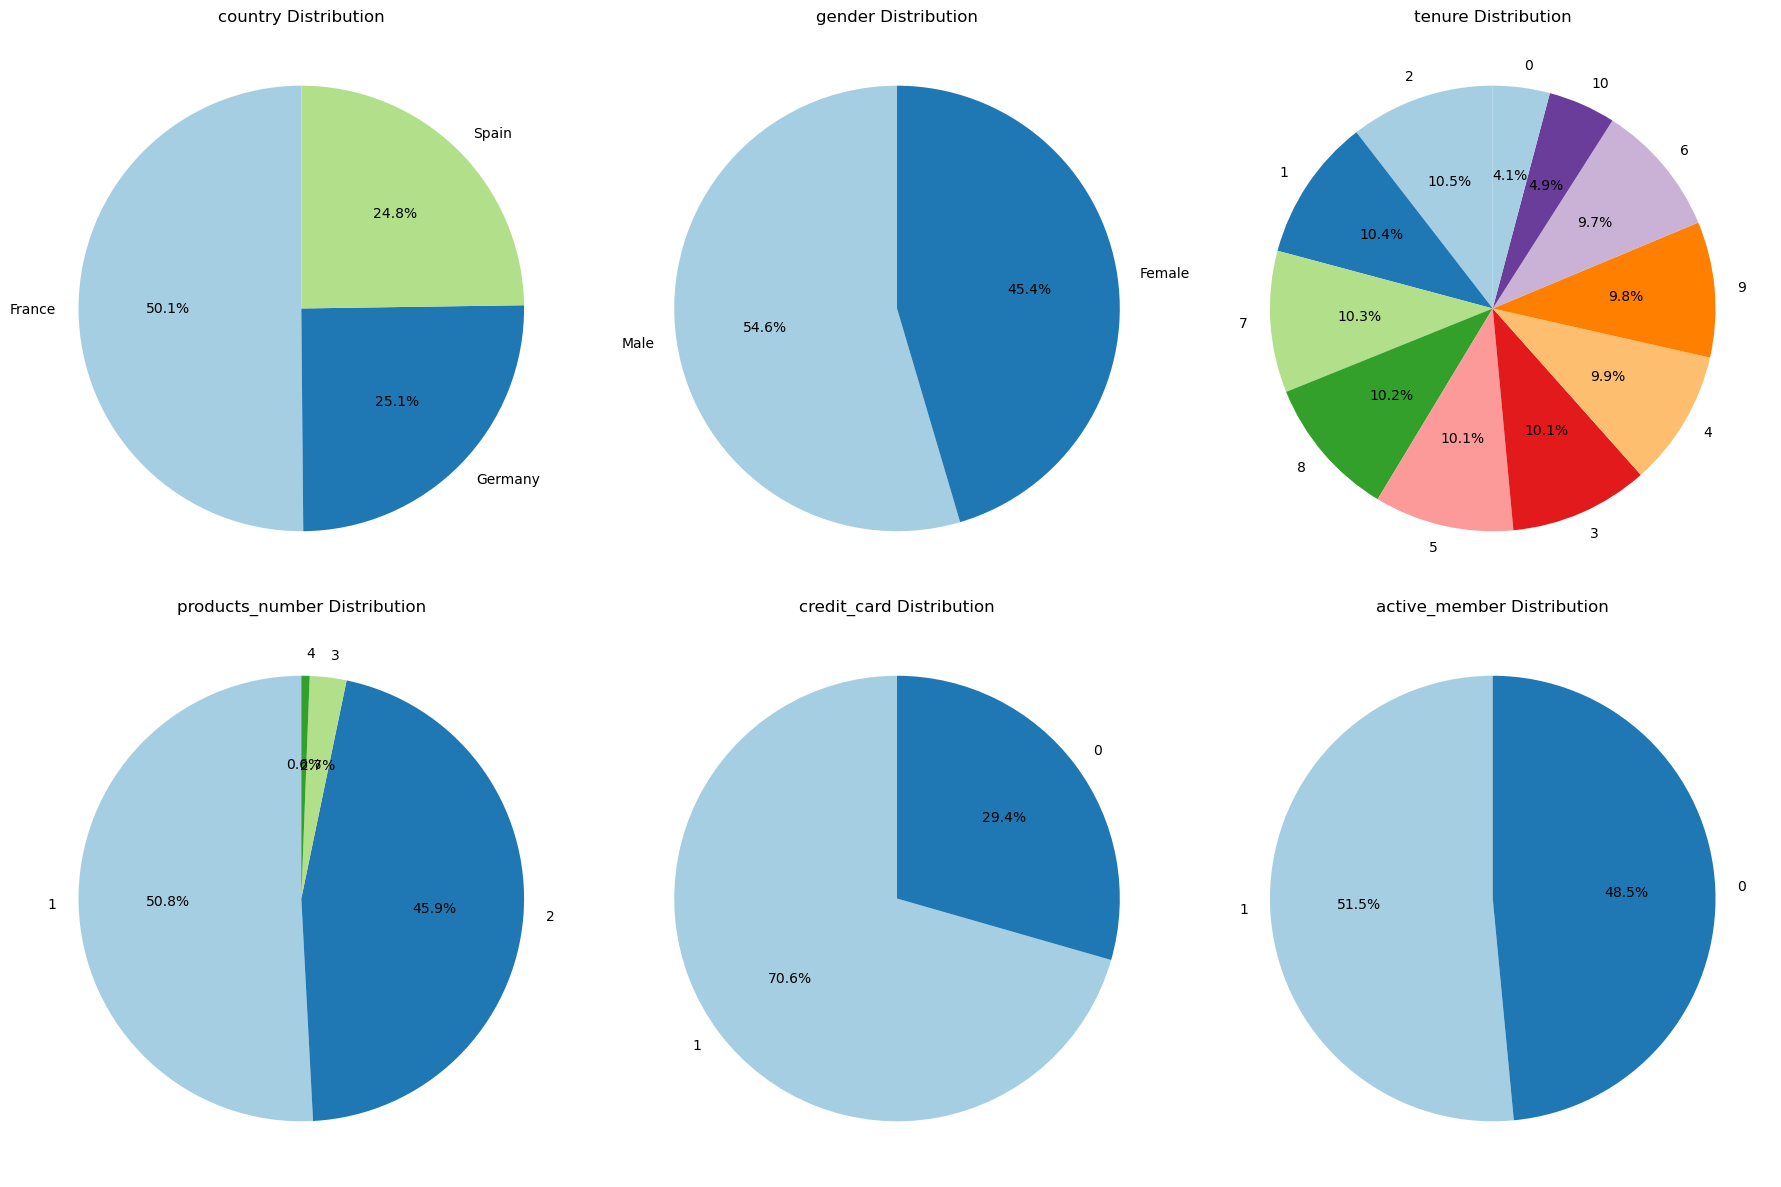

In [11]:
columns_to_plot = ['country', 'gender', 'tenure', 'products_number', 'credit_card', 'active_member']

fig, axs = plt.subplots(2, 3, figsize=(18, 12))


colors = plt.cm.Paired(range(10))


for ax, col in zip(axs.flatten(), columns_to_plot):
    
    value_counts = df[col].value_counts(normalize=True) * 100
    
    # Plot pie chart on the current axis
    ax.pie(value_counts, labels=value_counts.index, autopct=lambda pct: f'{pct:.1f}%', colors=colors, startangle=90)
    ax.set_title(f'{col} Distribution')
    
plt.tight_layout()
plt.show()

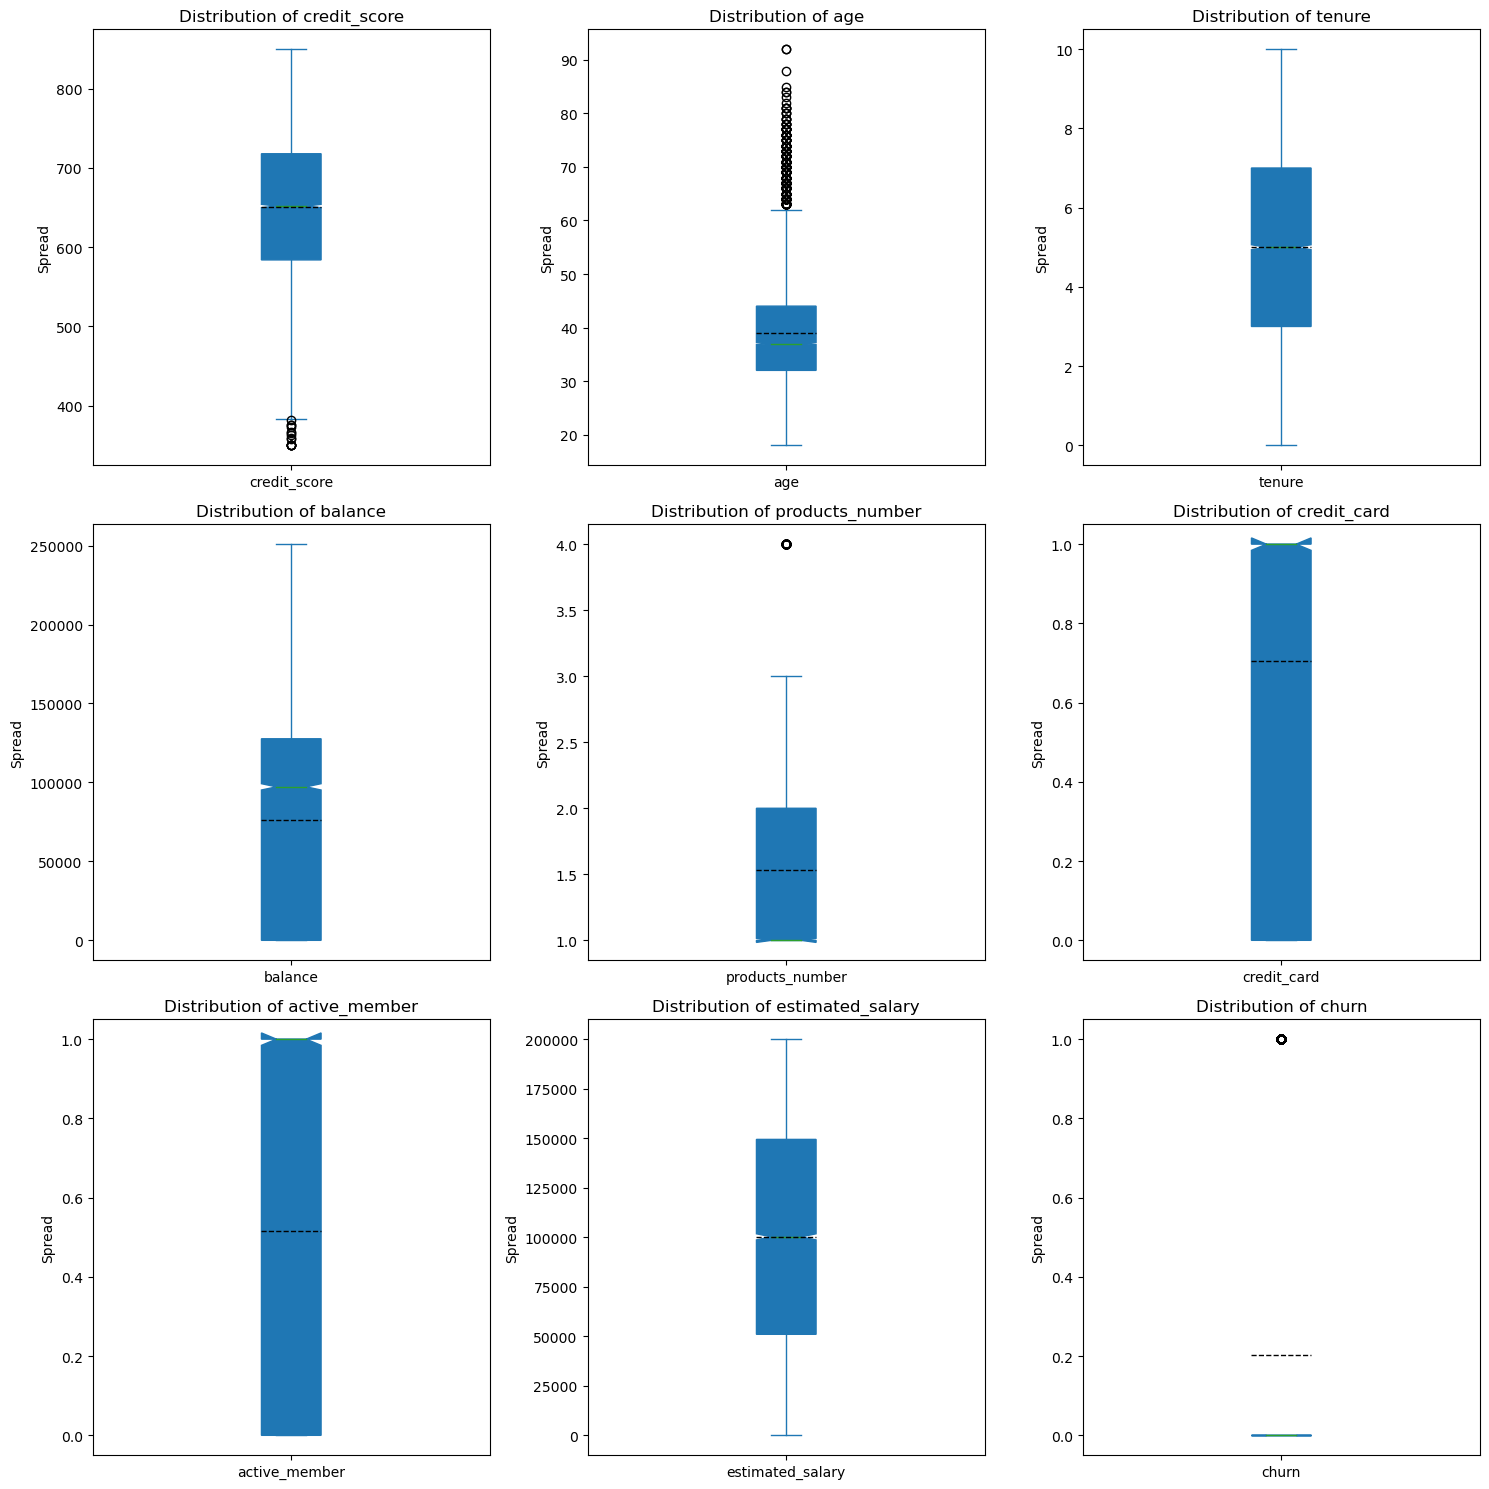

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
for i,cols in enumerate(num_features):
    ax = axes[i]
    df[cols].plot(kind='box', notch=True, patch_artist=True, meanline=True, showmeans=True, meanprops=dict(color='black'),ax=ax)
    
    ax.set_ylabel('Spread')
    
    ax.set_title(f"Distribution of {cols}")
    
plt.tight_layout()
plt.show()

## Plotting the values of age column vs the log of them

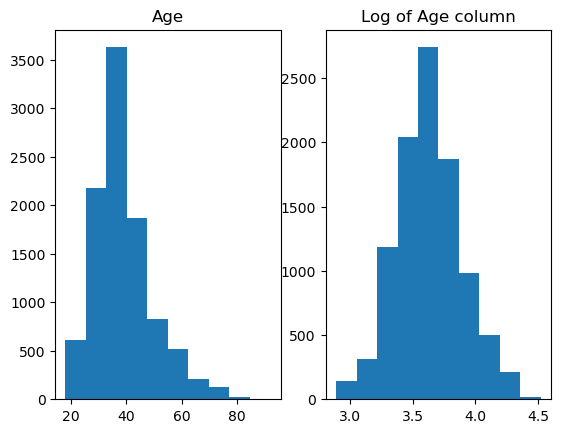

In [47]:
fig, axes = plt.subplots(1, 2)

axes[0].hist(df['age'])
axes[0].set_title('Age')

axes[1].hist(np.log(df['age']))
axes[1].set_title('Log of Age column')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['churn'], random_state=13)

In [53]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector, make_column_transformer

log_pipeline = make_pipeline(FunctionTransformer(np.log))
num_pipeline = make_pipeline(RobustScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

preprocessing = make_column_transformer(
    (log_pipeline, ['age']),
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [54]:
X_train, y_train = train_set.drop('churn', axis=1), train_set['churn']
X_test, y_test = test_set.drop('churn', axis=1), test_set['churn']

In [55]:
from xgboost import XGBClassifier

class_ratio = sum(y_train==0) / sum(y_train==1)

xgb_classifier = XGBClassifier(scale_pos_weight=class_ratio)

xgb_model = make_pipeline(preprocessing, xgb_classifier)

In [63]:
from sklearn.model_selection import cross_val_score

xgb_accs = cross_val_score(xgb_model, X_train, y_train, scoring='accuracy', cv=10)

In [64]:
xgb_accs

array([0.83125, 0.80125, 0.845  , 0.8125 , 0.815  , 0.8325 , 0.8325 ,
       0.815  , 0.84375, 0.81375])

In [67]:
pd.Series(xgb_accs).describe()

count    10.000000
mean      0.824250
std       0.014698
min       0.801250
25%       0.814062
50%       0.823125
75%       0.832500
max       0.845000
dtype: float64

## XG Boost

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'xgbclassifier__min_child_weight': [1, 5, 10],
    'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
    'xgbclassifier__subsample': [0.6, 0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
    'xgbclassifier__max_depth': [3, 4, 5]
}

full_pipeline = make_pipeline(preprocessing, XGBClassifier(scale_pos_weight=class_ratio))

grid_search = GridSearchCV(full_pipeline, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('functiontransformer',
                                                                                          FunctionTransformer(func=<ufunc 'log'>))]),
                                                                         ['age']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002ABA08FDAF0>)...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'xgbclassifier__colsample_bytree': [0.6, 0.8, 1.0],
                         'xgbclassifier__gamma': [0.5, 1, 1.5, 2, 5],
                         'xgbclassifier__max_depth': [3, 4, 5],
                         'xgbclassifier__min_child_weight': [1, 5, 10],
                         'xgbclassifier__subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [89]:
grid_search.best_params_

{'xgbclassifier__colsample_bytree': 1.0,
 'xgbclassifier__gamma': 1.5,
 'xgbclassifier__max_depth': 5,
 'xgbclassifier__min_child_weight': 1,
 'xgbclassifier__subsample': 0.8}

In [90]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res = cv_res.sort_values('mean_test_score', ascending=False)

In [91]:
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbclassifier__colsample_bytree,param_xgbclassifier__gamma,param_xgbclassifier__max_depth,param_xgbclassifier__min_child_weight,param_xgbclassifier__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
343,0.127001,0.001224,0.013751,0.000434,1.0,1.5,5,1,0.8,"{'xgbclassifier__colsample_bytree': 1.0, 'xgbc...",0.8180,0.8180,0.8280,0.8250,0.822250,0.004380,1
316,0.130501,0.005124,0.013749,0.000433,1.0,1,5,1,0.8,"{'xgbclassifier__colsample_bytree': 1.0, 'xgbc...",0.8165,0.8185,0.8180,0.8265,0.819875,0.003895,2
370,0.122001,0.002236,0.013249,0.000433,1.0,2,5,1,0.8,"{'xgbclassifier__colsample_bytree': 1.0, 'xgbc...",0.8240,0.8170,0.8160,0.8220,0.819750,0.003345,3
289,0.131751,0.003192,0.013249,0.000433,1.0,0.5,5,1,0.8,"{'xgbclassifier__colsample_bytree': 1.0, 'xgbc...",0.8225,0.8105,0.8285,0.8155,0.819250,0.006833,4
181,0.129501,0.004717,0.013499,0.000500,0.8,1,5,1,0.8,"{'xgbclassifier__colsample_bytree': 0.8, 'xgbc...",0.8165,0.8165,0.8190,0.8240,0.819000,0.003062,5


In [92]:
final_model = grid_search.best_estimator_

In [93]:
y_preds = final_model.fit(X_train, y_train)

In [94]:
y_preds = final_model.predict(X_test)

In [95]:
from sklearn.metrics import f1_score

f1_score(y_test, y_preds)

0.5941240478781284

In [97]:
print(accuracy_score(y_test, y_preds))
print(recall_score(y_test, y_preds))
print(precision_score(y_test, y_preds))

0.8135
0.6707616707616708
0.533203125


In [103]:
print(f1_score(y_test, y_preds))

0.6112759643916914


## Random Forest

In [109]:
from sklearn.pipeline import Pipeline
from scipy.stats import randint

In [120]:
forest_model = Pipeline([
    ('preprocessing', preprocessing),
    ('random_forest', RandomForestClassifier(random_state=13))
])

param_grid = {
    'random_forest__n_estimators': [50, 100, 200],  
    'random_forest__max_depth': [None, 10, 20, 30],  
    'random_forest__min_samples_split': [2, 5, 10],  
    'random_forest__min_samples_leaf': [1, 2, 4]  
}

random_forest_result = GridSearchCV(estimator=forest_model, 
                       param_grid=param_grid, 
                       cv=5,  
                       verbose=True,  
                       n_jobs=-1)  

random_forest_result.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('functiontransformer',
                                                                                          FunctionTransformer(func=<ufunc 'log'>))]),
                                                                         ['age']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002ABA08FDAF0>),
                                                                        ('p...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002ABA08FDB80>)])),
                                       ('random_forest',
                                        RandomForestClassifier(random_state=13))]),
             n_jobs=-1,
             param_grid={'random_forest__max_depth': [None, 10, 20, 30],
                         'random_forest__min_samples_leaf': [1, 2, 4],
                         'random_forest__min_samples_split': [2, 5, 10],
                         'random_forest__n_estimators': [50, 100, 200]},
             verbose=True)

In [121]:
y_preds = random_forest_result.predict(X_test)

In [122]:
print(accuracy_score(y_test, y_preds))
print(recall_score(y_test, y_preds))
print(precision_score(y_test, y_preds))

0.8555
0.47174447174447176
0.7218045112781954


In [123]:
f1_score(y_test, y_preds)

0.5705794947994056